In [1]:
import glob
import pandas as pd
df1 = pd.DataFrame()
fs = glob.glob("train/cat.*.jpg")
df1["path"] = fs
df1["target"] = 0
df1
df2 = pd.DataFrame()
fs = glob.glob("train/dog.*.jpg")
df2["path"] = fs
df2["target"] = 1
df2
df = pd.concat([df1, df2], axis=0, ignore_index=True)

In [2]:
#將資料切割成train & test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df["path"], 
                                                    df["target"], 
                                                    test_size=0.2)

In [3]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary()


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [4]:
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
#trainable一定要在compile前設置
for i in vgg.layers:
    l.train
x = Flatten()(vgg.output)
x = Dense(2048, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(2, activation="softmax")(x) #最後輸出為1個選sigmoid 2個或以上為softmax
cnn = Model(inputs=vgg.input, outputs=x)
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:
#基礎語法
def test():
    return print
test()("hello")

hello


In [7]:
cnn.compile(loss="categorical_crossentropy",
           optimizer="adam",
           metrics=["accuracy"])

In [9]:
#請在fit之前 把所以東西轉換成numpy array
import numpy as np
from keras.utils.np_utils import to_categorical
x_train_np = np.array(x_train)
x_test_np = np.array(x_test)
y_train_np = np.array(y_train)
y_train_np_cat = to_categorical(y_train)
y_test_np = np.array(y_test)
y_test_np_cat = to_categorical(y_test)

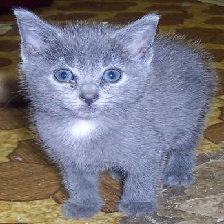

In [11]:
#Pillow(PIL)
from keras.preprocessing.image import load_img
load_img(x_train_np[0], target_size=(224, 224))

In [13]:
# 在預處理圖片時 一定用人家的預處理方式
from keras.applications.vgg16 import preprocess_input
batch = 20
for i in range(5):
    idx = np.random.randint(0, x_train.shape[0], batch)
    ps = x_train_np[idx]
    ts = y_train_np_cat[idx]
    img_list = []
    for p in ps:
        img = load_img(p, target_size=(224, 224))
        img_pre = preprocess_input(np.array(img))
        img_list.append(np.array(img))
    img_list_np = np.array(img_list)
    result = cnn.train_on_batch(img_list_np, ts)
    print("times:", i)
    print(result)

times: 0
[5.6197414, 0.5]
times: 1
[5.6413336, 0.65]
times: 2
[8.059048, 0.5]
times: 3
[6.447238, 0.6]
times: 4
[8.864952, 0.45]


In [14]:
cnn.predict(img_list_np)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)